In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import numpy as np

In [16]:
df = pd.read_csv("../datasets/data_to_plot.csv")


In [42]:
Ducks = df[['x_coord','y_coord','Anaheim Ducks']]
grid = np.zeros((200,100))
print(grid.shape)
for index,row in Ducks.iterrows():
    grid[int(row['x_coord'])+100,int(row['y_coord'])+50] += row['Anaheim Ducks']
grid

(200, 100)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])


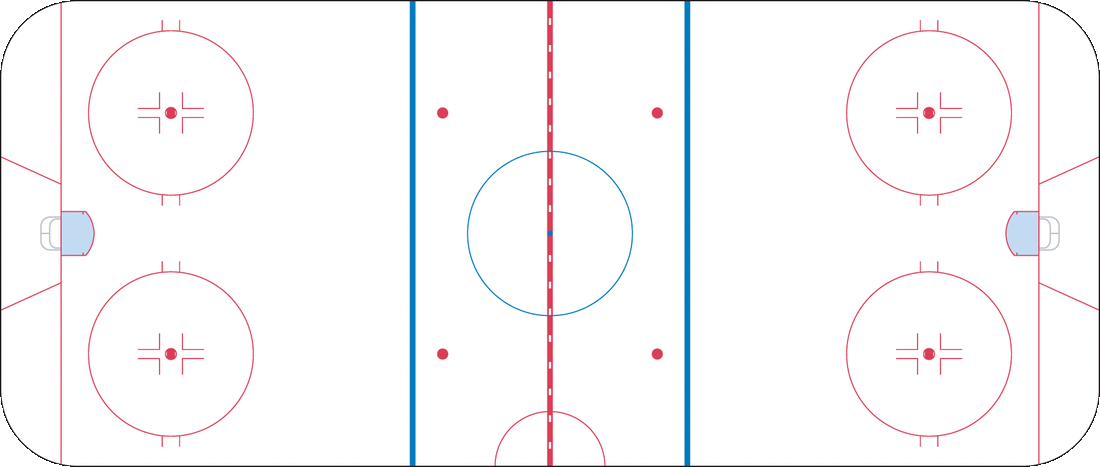

In [72]:
pyLogo = Image.open("../figures/nhl_rink.png").convert("RGB")
fig = px.imshow(pyLogo)

x = np.array(range(-100,100))
y = np.array(range(-50,50))



fig = go.Figure(go.Contour(
                x = y,
                y = x, 
                z= grid.T,
                colorscale='RdBu',
                reversescale=True,
                connectgaps= False,
                
    
            ))

fig.add_layout_image(
            dict(
                source=Image.open("../figures/nhl_rink.png"),
                xref="x",
                yref="y",
               x=-50,
                y=-3,
                sizex=200,
               sizey=100,
               # sizing="stretch",
                opacity=0.5,
                layer="above")
    )


# Set templates
fig.update_layout(template="plotly_white")

fig.show()